In [147]:
using Plots
include("DGP.ji")
include("qgplsim.ji")
α = [-1, 2] # single index for x
θ = [2, 1]  # linear for x, <α, θ> = 0 for identification
# γ = [0, 0]
# β = [0, -0]
γ = [1, 2] # single index for z
β = [1, -0.5] # linear for z

# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
# p = length(α)
# q = length(γ)

500

In [153]:
τ = 0.5
X, Z, y = dgp(n, γ, θ, α, β, true)
model1 = qgplsim.model(X, Z, y, τ)
@time alpha, theta, gamma = qgplsim.estimator(model1)

  5.665716 seconds (81.73 M allocations: 8.772 GiB, 30.65% gc time)


([-0.4945347037468165, 0.8326995473253404], [1.9661661057442261 1.2183266338102414], [0.43477093892041774, 0.7369179422851008])

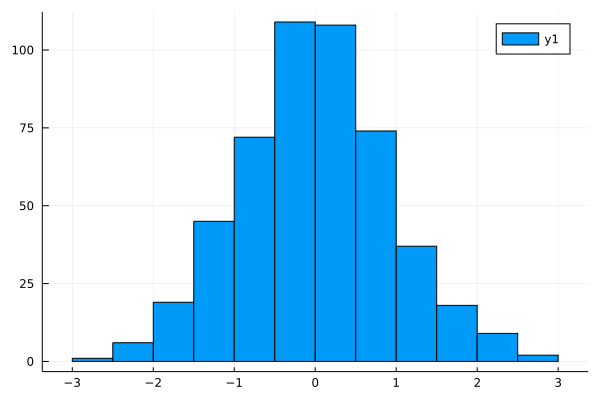

In [154]:
v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
histogram(v)

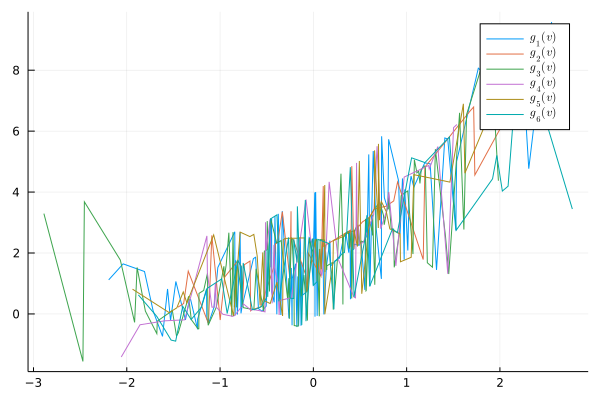

In [155]:
g, dg = qgplsim.Gz_DGz(v, Z, y) # g: g(v), dg: g'(v)
using LaTeXStrings
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

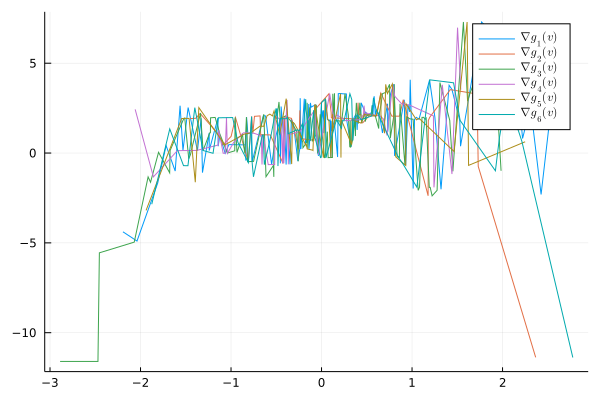

In [156]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end
fig

In [121]:
Theta = zeros(100, p)
Alpha = zeros(100, p)
Gamma = zeros(100, p)
import Base.Threads.@threads

In [122]:
t = time()
len = 50
@threads for i in 1:2
        for j in 1:len
    X, Z, y = dgp(n, γ, θ, α, β, true)
    model_ij = qgplsim.model(X, Z, y)
    Alpha[len*(i - 1) + j, :], Theta[len*(i - 1) + j, :],Gamma[len*(i - 1) + j, :] = qgplsim.estimator(model_ij)
    end
end
println("MC Computing time: ", time() - t)
println(sum(Alpha, dims = 1))
println(sum(Theta, dims = 1))
println(sum(Gamma, dims = 1))


MC Computing time: 452.3261408805847
[-12.51270486109938 58.61983674978423]
[154.65646298759592 120.76459097406067]
[22.587002186694107 52.17712101834856]


In [123]:
set_alpha, index_alpha, most_alpha = qgplsim.collection(sign.(Alpha))

(Any[[-1.0, 1.0], [1.0, 1.0], [1.0, -1.0]], Dict{Any, Any}([-1.0, 1.0] => [1, 4, 6, 7, 9, 10, 11, 12, 13, 14  …  83, 84, 86, 89, 92, 93, 96, 98, 99, 100], [1.0, -1.0] => [5, 16, 18, 34, 38, 41, 58, 66, 71, 76, 77, 79, 90, 91, 97], [1.0, 1.0] => [2, 3, 8, 15, 23, 30, 31, 33, 52, 59, 67, 69, 70, 85, 87, 88, 94, 95]), [-1.0, 1.0])

In [124]:
dc = index_alpha
mc = most_alpha

2-element Vector{Float64}:
 -1.0
  1.0

In [125]:
rAlpha = Alpha[dc[mc], :]
rTheta = Theta[dc[mc], :]
rGamma = Gamma[dc[mc], :]
ns, = size(rAlpha)

(67, 2)

In [126]:
sum(rAlpha, dims = 1)/ns

1×2 Matrix{Float64}:
 -0.475338  0.802982

In [127]:
sum(rTheta, dims = 1)/ns

1×2 Matrix{Float64}:
 1.93362  1.26076

In [128]:
sum(rGamma, dims = 1)/ns

1×2 Matrix{Float64}:
 0.244664  0.55404